<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/Linear_Regression_on_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
The objective of this practise is to predict the life expectancy of
different countries during different years given different
socioeconomic features.

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

## Initial Study of the Dataset

In [7]:
LE_data = pd.read_csv('LifeExpectancy.csv', index_col=[0])

LE_data.shape

(2938, 22)

In [8]:
LE_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Preprocessing of Data

Linear regression model is not compatible with missing values or categorical variables. The absoulte minimum one must do is remove missing samples and categorical variables

### Missing values

In [9]:
# Find missing values
missing_values = LE_data.isnull().sum()
missing_values.sort_values(ascending=False)

population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
thinness_5_9_years                  34
thinness__1_19_years                34
bmi                                 34
polio                               19
diphtheria                          19
life_expectancy                     10
adult_mortality                     10
hiv_aids                             0
country                              0
year                                 0
measles                              0
percentage_expenditure               0
infant_deaths                        0
status                               0
under_five_deaths                    0
dtype: int64

In [10]:
print(LE_data.dtypes, type(LE_data.dtypes))

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under_five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv_aids                           float64
gdp                                float64
population                         float64
thinness__1_19_years               float64
thinness_5_9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object <class 'pandas.core.series.Series'>


### Category Type
Changing columns with datatype object into datatype='category'

In [11]:
print(LE_data.dtypes[LE_data.dtypes=='object']) # filter columns having dtype as object

# putting these columns into a list & marking them as 'category' data type
categorical_columns = list(LE_data.dtypes[LE_data.dtypes=='object'].index.values)

for column in categorical_columns:
  LE_data[column] = LE_data[column].astype('category')

print(LE_data.dtypes)

country    object
status     object
dtype: object
country                            category
year                                  int64
status                             category
life_expectancy                     float64
adult_mortality                     float64
infant_deaths                         int64
alcohol                             float64
percentage_expenditure              float64
hepatitis_b                         float64
measles                               int64
bmi                                 float64
under_five_deaths                     int64
polio                               float64
total_expenditure                   float64
diphtheria                          float64
hiv_aids                            float64
gdp                                 float64
population                          float64
thinness__1_19_years                float64
thinness_5_9_years                  float64
income_composition_of_resources     float64
schooling                 

### Partition of the Dataset

In [12]:
X = LE_data.loc[:, LE_data.columns != 'life_expectancy'] #data
y = LE_data['life_expectancy'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1968, 21), (970, 21), (1968,), (970,))

### Applying Preprocessing

In [13]:
def minimum_preprocessing(X, y):
  print(f'Original Size: {X.shape}')
  categorical_columns = X.dtypes[X.dtypes=='category'].index.values
  # Remove categorical values
  X = X.drop(columns=categorical_columns)
  print(f'Removed: {categorical_columns}')
  # Remove missing values
  X = X.dropna()
  y = y[X.index]
  print('New Size: {X.shape}')
  return X, y

We will separately apply our preprocessing to our training and test partitions to avoid biasing our data.

In [14]:
X_train, y_train = minimum_preprocessing(X_train,y_train)
X_test, y_test = minimum_preprocessing(X_test,y_test)

Original Size: (1968, 21)
Removed: ['country' 'status']
New Size: {X.shape}
Original Size: (970, 21)
Removed: ['country' 'status']
New Size: {X.shape}


## Linear Regression

Little reminder of how linear regression works:

We model our regression function as

 $y = f(x) + \epsilon = w^\top x + \epsilon$

 dónde:
 * $y$ is the target.
 * $w$ are the weights that we will calculate.
 * $x$ are the samples.
 * $\epsilon$ is the noise of the samples.

 If we assume that the noise is Gaussian, solving this problem is equivalent to minimizing the root mean square error of this function.

 $\min_w || y-Xw ||^2$

 We will look at two different implementations of linear regression. The one from statsmodels and the one from scikit-learn.

#### Scikit-Learn Linear Regression
Scikit-learn models are easy to use. They are all implemented in classes with the same structure, so when you know one, you know all of them.

In [15]:
# Init the model
lr = LinearRegression()

# Fit the model with the dataset
lr.fit(X_train, y_train)

# Predict the target
y_pred = lr.predict(X_test)

In [16]:
weights = lr.coef_

mse = mean_squared_error(y_test, y_pred)
print('Coefficients: \n', weights[:10])
print(f"mean squared error: {mse}")

Coefficients: 
 [-1.21483535e-01 -1.68251345e-02  7.60436005e-02 -1.33564134e-01
  2.40339768e-04  3.53638937e-03 -8.12857649e-06  2.96853364e-02
 -5.65589548e-02  1.00808228e-02]
mean squared error: 13.464948848179553


In [17]:
y_train.head(8)

106     73.0
1243    64.7
2579    72.5
826     71.2
2559    66.7
1775    54.0
98      74.4
835     57.9
Name: life_expectancy, dtype: float64

In [18]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head(8)

,0
0,73.799870
1,68.333106
2,80.730127
3,76.955801
4,63.804120
5,72.738940
6,71.761975
7,85.652616


#### StatsModels Linear Regression
Complex model but generates large statistical data that can be useful

In [19]:
# Linear regression is Ordinary Least Squares in statsmodels
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     306.3
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:30:57   Log-Likelihood:                -2921.0
No. Observations:                1094   AIC:                             5882.
Df Residuals:                    1074   BIC:                             5982.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             295.4844     56.527      5.227      0.000     184.568     406.401
year                               -0.1215      0.028     -4.304      0.000      -0.177      -0.066
adult_mortality                    -0.0168      0.001    -14.190      0.000      -0.019      -0.014
infant_deaths                       0.0760      0.013      5.864      0.000       0.051       0.101
alcohol                            -0.1336      0.038     -3.547      0.000      -0.207      -0.060
percentage_expenditure              0.0002      0.000      1.191      0.234      -0.000       0.001
hepatitis_b                         0.0035      0.005      0.676      0.499      -0.007       0.014
measles                         -8.129e-06   1.49e-05     -0.546      0.585   -3.74e-05    2.11e-05
bmi                                 0.0297      0.007      4.159      0.000       0.016       0.044
under_five_deaths                  -0.0566      0.009     -6.087      0.000      -0.075      -0.038
polio                               0.0101      0.006      1.654      0.098      -0.002       0.022
total_expenditure                   0.1371      0.049      2.773      0.006       0.040       0.234
diphtheria                          0.0138      0.007      1.930      0.054      -0.000       0.028
hiv_aids                           -0.4573      0.024    -19.387      0.000      -0.504      -0.411
gdp                              3.765e-05   3.21e-05      1.174      0.241   -2.53e-05       0.000
population                      -1.292e-09   2.27e-09     -0.568      0.570   -5.76e-09    3.17e-09
thinness__1_19_years                0.0137      0.059      0.234      0.815      -0.101       0.129
thinness_5_9_years                 -0.0583      0.058     -1.000      0.318      -0.173       0.056
income_composition_of_resources    10.2510      1.009     10.165      0.000       8.272      12.230
schooling                           0.9268      0.072     12.902      0.000       0.786       1.068
==============================================================================
Omnibus:                       28.924   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.227
Skew:                          -0.170   Prob(JB):                     2.77e-12
Kurtosis:                       4.025   Cond. No.                     3.66e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of the model

#### Residual follow Gaussian Distribution
One way is to plot the residuals of the training data and verify that they follow a Gaussian distribution since it is our initial assumption (Gaussian error).
If residual follows a Gaussian distribution, it indicates that residual is spread out more about the mean(that is zero).

<ipython-input-20-3bbc6dd84d4c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, bins=30) # plot distribution of residual of the model


<Axes: ylabel='Density'>

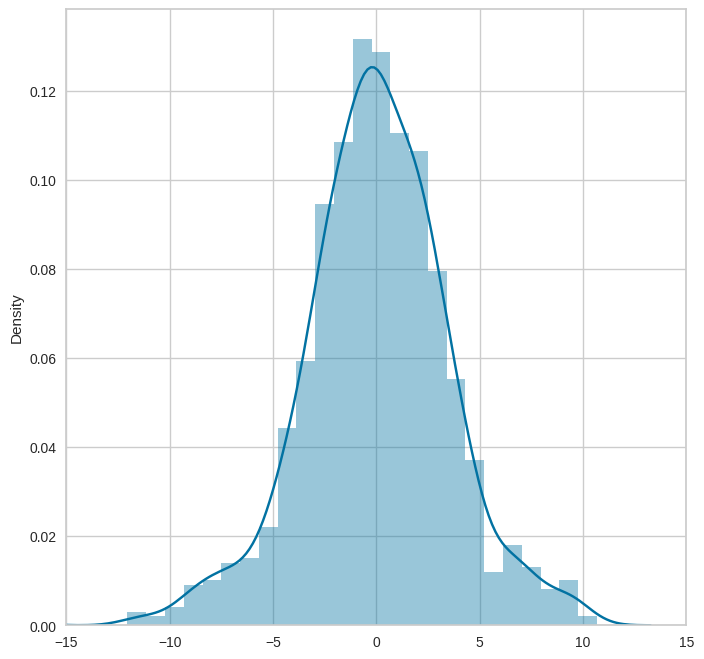

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-15, 15]) # set the range on X-axis
sns.distplot(result.resid, bins=30) # plot distribution of residual of the model

#### Probablity Plot

The probability plot is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal.

((array([-3.2234016 , -2.96015505, -2.8133788 , ...,  2.8133788 ,
          2.96015505,  3.2234016 ]),
  array([-16.59169176, -12.03719397, -11.55877571, ...,   9.72910561,
          10.17555225,  10.67187951])),
 (3.482536680316547, -5.443353346660786e-10, 0.9941431064686068))

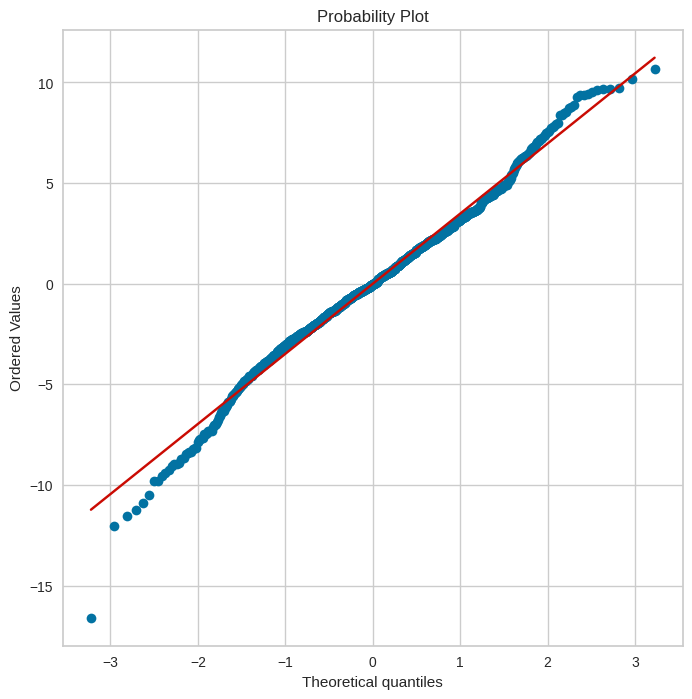

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
stats.probplot(result.resid, plot=plt)

#### QQ Plot
The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first dataset against the quantiles of the second dataset.

We can obtain a graph of the residuals of the training and the test with the _qqplot_ with the `yellowbrick` library

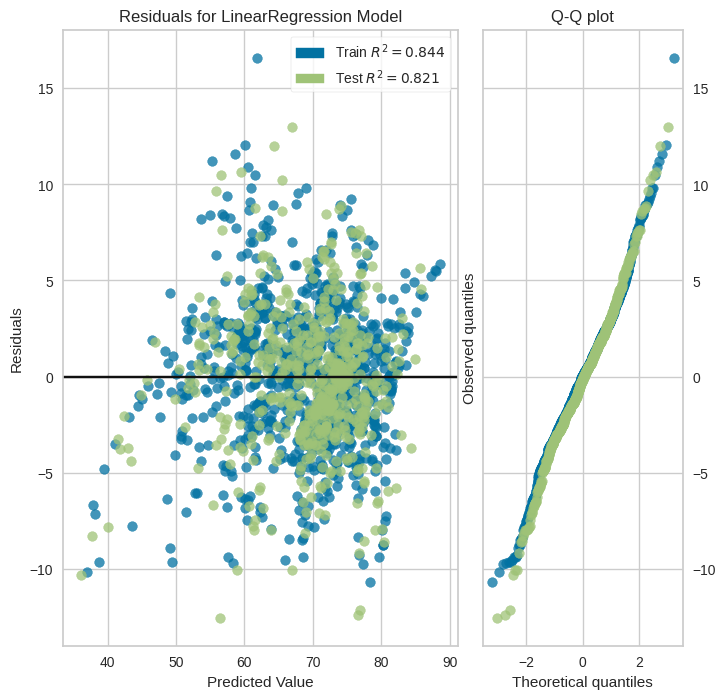

In [22]:
plt.figure(figsize=(8, 8))
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False)

#### Visualize Predictions with respect to Actual Values
We can also plot the predictions against actual values and see how much they deviate from the ideal prediction.

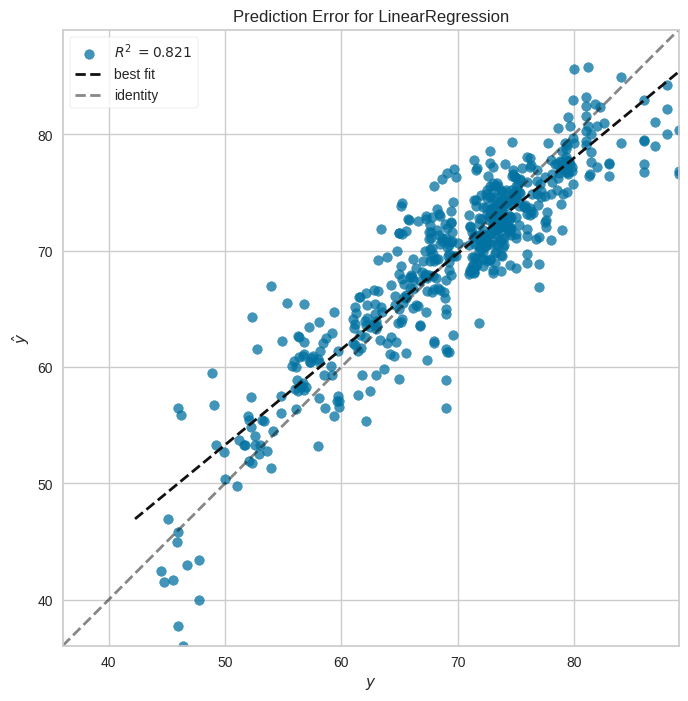

In [23]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr,X_test,y_test,is_fitted=True)

### Metrics
There are alternative metrics that we can use to measure the performance of a regression model.

#### Normalized Mean Squared Error

$norm\_MSE(t,y) = \frac {MSE(t,y)}{\sigma^2(t)} $

The best possible result would be an Normalized MSE of 0, which would mean a perfect prediction.

**Mean Squared Error (MSE)**

$MSE(t,y) = \frac{1}{N} \sum_{i=1}^N (t - y(x;w))^2$

- While MSE gives an absolute measure of the average squared error, NMSE provides a relative measure by scaling the error with respect to the variability of the observed data.
- NMSE is scale-independent as it normalizes the error by dividing it by the variance, making it easier to interpret across different datasets.

In [24]:
from sklearn.metrics import mean_squared_error
N = X_train.shape[0]
# using statsmodel
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train-prediction)**2)/N

# using scikit-learn
mean_square_error_sk = mean_squared_error(y_train,prediction)

#This number depends on the magnitude of the target variable, so we cannot know if it is good or bad directly.
mean_square_error, mean_square_error_sk

(12.208432912601651, 12.208432912601651)

##### Normalized Mean Sqared Error

$norm\_MSE(t,y) = \frac {MSE(t,y)}{\sigma^2(t)} $

The best possible result would be an Normalized MSE of 0, which would mean a perfect prediction.

In [25]:
norm_mse = np.sum((y_train - prediction)**2)/((N)*np.var(y_train))
norm_mse_from_r2 = 1 - r2_score(y_train, prediction)
norm_mse, norm_mse_from_r2

(0.15580503299062462, 0.15580503299062465)

#### R-squared(R^2)

The R^2 (usually used by statisticians) is obtained by subtracting this amount from one; that is, the proportion of the target variability that the model explains.

This metric is usually shown between 0 and 1 or in percentage, but keep in mind that it is not limited below, a regression can be arbitrarily bad (negative values).

Example: R-Squared value of 0.9 would indicate that 90% of the variance of the dependent variable being studied is explained by the variance of the independent variable.

In [26]:
R_squared = 1 - norm_mse

#We can also use scikit-learn
R_squared_sk = r2_score(y_train,prediction)

R_squared,R_squared_sk
#The proportion of the target variability explained by the model reaches ~85%

(0.8441949670093754, 0.8441949670093754)

## Cross Validation

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


In [28]:
cross_val_matrics = pd.DataFrame(columns=['MSE', 'NMSE', 'R2'])

kf = KFold()
i = 1

for train_index, test_index in kf.split(X_train) :
  print(f'Split {i}: \n\tTest Folds:[{i}] \n\tTrain Folds:{[j for j in range(1, 6) if j != i]}')

  x_train_fold = X_train.values[train_index]
  y_train_fold = y_train.values[train_index]
  x_test_fold = X_train.values[test_index, :]
  y_test_fold = y_train.values[test_index]

  lr = LinearRegression().fit(x_train_fold, y_train_fold)
  y_pred_fold = lr.predict(x_test_fold)

  fold_mse = mean_squared_error(y_test_fold, y_pred_fold)
  fold_nmse = 1 - r2_score(y_test_fold, y_pred_fold)
  fold_r2 = r2_score(y_test_fold, y_pred_fold)

  print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

  cross_val_matrics.loc[f'Fold {i}, :'] = [fold_mse, fold_nmse, fold_r2]
  i = i + 1



Split 1: 
	Test Folds:[1] 
	Train Folds:[2, 3, 4, 5]
	MSE: 12.850 NMSE: 0.161 R2: 0.839
Split 2: 
	Test Folds:[2] 
	Train Folds:[1, 3, 4, 5]
	MSE: 13.801 NMSE: 0.170 R2: 0.830
Split 3: 
	Test Folds:[3] 
	Train Folds:[1, 2, 4, 5]
	MSE: 11.898 NMSE: 0.159 R2: 0.841
Split 4: 
	Test Folds:[4] 
	Train Folds:[1, 2, 3, 5]
	MSE: 14.490 NMSE: 0.172 R2: 0.828
Split 5: 
	Test Folds:[5] 
	Train Folds:[1, 2, 3, 4]
	MSE: 11.203 NMSE: 0.163 R2: 0.837


#### Mean as the Final Metric
We will use the mean of the partitions as our metric.

In [30]:
cross_val_matrics.loc['Mean',:] = cross_val_matrics.mean()

cross_val_matrics

,MSE,NMSE,R2
"Fold 1, :",12.850473,0.160540,0.839460
"Fold 2, :",13.800676,0.170354,0.829646
"Fold 3, :",11.897522,0.158934,0.841066
"Fold 4, :",14.490371,0.171805,0.828195
"Fold 5, :",11.202593,0.162754,0.837246
Mean,12.848327,0.164877,0.835123
